<a href="https://colab.research.google.com/github/ekaratnida/Applied-machine-learning/blob/master/Week05-Logistic/Logistic_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

# Logistic Regression

In [1]:
from sklearn.datasets import make_classification
import numpy as np

# Sigmoid function

In [2]:
def sigmoid(z):
    """ sigmoid """
    return 1 / (1 + np.exp(-z))

# Cost function (NLLLoss)


In [3]:
def cost(x, y, theta):
    m = x.shape[0]
    h = sigmoid(np.matmul(x, theta))
    print("h = ",h)
    cost = -1* (1/m)*(np.matmul(-y.T, np.log(h)) + np.matmul((1 -y.T), np.log(1 - h)))
    return cost

# Gradient descent

In [4]:
def gradient_Descent(theta, alpha, x , y):
    m = x.shape[0]
    h = sigmoid(theta.T.dot(x.T))
    error = h-y
    grad = x.T.dot(error.T)
    theta = theta - (alpha * grad)/m
    return theta

# Training model

In [32]:
X, Y = make_classification(n_samples=10, n_features=4, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

print(X)
print(Y)

X_b = np.c_[np.ones((X.shape[0],1)),X]
print(X_b)
n_iterations = 10
learning_rate = 0.3

#init
Theta = np.random.random((X_b.shape[1],1))
print("Theta = ",Theta)

for i in range(n_iterations):
    Theta = gradient_Descent(Theta, learning_rate, X_b, Y)
    if i % 5 == 0:
      print("Cost = ", cost(X_b, Y, Theta))
      print("Theta = ", Theta)

h = sigmoid(Theta.T.dot(X_b.T))
print("h = ",h)
print((h > .5).astype(int) )

[[ 0.96106455  0.93095988  0.87507402  0.7105399 ]
 [-0.13406433  0.00470758 -0.89989113  0.62318767]
 [-0.97772158 -2.55856575  1.64949685 -0.92974401]
 [ 1.26372099  0.44538374 -0.19533331 -1.97934857]
 [-0.31859205  0.2193885  -1.03015981 -0.20271649]
 [ 1.05965521  1.2045055   0.11108051 -1.09376775]
 [ 0.6404234  -0.36120904 -2.10924743 -0.71156531]
 [-1.7356517  -1.05194397 -0.75494625  0.61173844]
 [ 0.9047388   0.97969276  0.32837496  0.12924181]
 [ 1.44693294  0.14484156 -0.0856099   0.48707415]]
[1 0 0 0 0 1 1 0 1 1]
[[ 1.          0.96106455  0.93095988  0.87507402  0.7105399 ]
 [ 1.         -0.13406433  0.00470758 -0.89989113  0.62318767]
 [ 1.         -0.97772158 -2.55856575  1.64949685 -0.92974401]
 [ 1.          1.26372099  0.44538374 -0.19533331 -1.97934857]
 [ 1.         -0.31859205  0.2193885  -1.03015981 -0.20271649]
 [ 1.          1.05965521  1.2045055   0.11108051 -1.09376775]
 [ 1.          0.6404234  -0.36120904 -2.10924743 -0.71156531]
 [ 1.         -1.7356517  

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
Y = [0, 2, 0,1,1,2,0,1,0,2]
clf = OneVsRestClassifier(LogisticRegression()).fit(X, Y)
print("Actual Y =",Y)
print(clf.predict(X))
print(clf.predict_proba(X))
clf.score(X, Y)

Actual Y = [0, 2, 0, 1, 1, 2, 0, 1, 0, 2]
[0 0 0 0 1 0 1 1 0 0]
[[0.48395516 0.08845442 0.42759041]
 [0.34145623 0.32215342 0.33639035]
 [0.67362078 0.27063689 0.05574233]
 [0.37846875 0.35278741 0.26874383]
 [0.26295067 0.47661911 0.26043022]
 [0.35747403 0.28544748 0.35707849]
 [0.25506835 0.44195215 0.3029795 ]
 [0.3201187  0.53760181 0.14227949]
 [0.42323925 0.16054884 0.41621192]
 [0.47916423 0.08738092 0.43345485]]


0.5

# SKLearn

In [19]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
print(X)
print(y)
clf = LogisticRegression(random_state=0).fit(X, y)
print(clf.predict(X[-2:, :]))
#clf.predict_proba(X[:2, :])
#clf.score(X, y)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


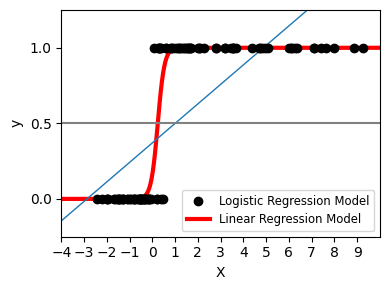

In [21]:
# Code source: Gael Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from scipy.special import expit

# General a toy dataset:s it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float64)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()

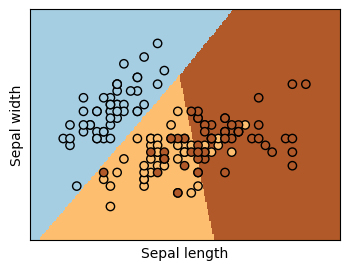

In [22]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = LogisticRegression(C=1e5)

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

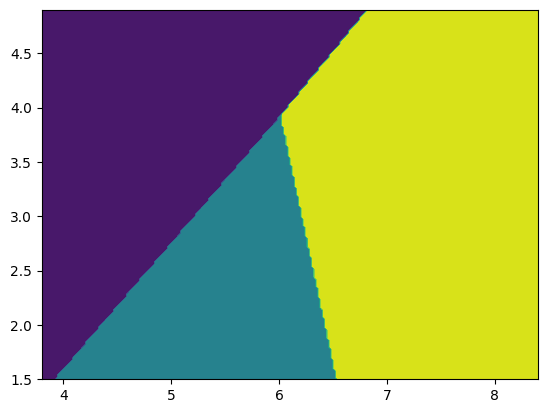

In [29]:
from sklearn.inspection import DecisionBoundaryDisplay
display = DecisionBoundaryDisplay(
    xx0=xx, xx1=yy, response=Z
)
display.plot()